# Analysing Netflix family account activity 
## Inspired by https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Firstly, I am loading the data and I am chcecking the shape of the data and included information

In [41]:
df = pd.read_csv('ViewingActivity.csv')
print(df.shape)
df.head(3)

(1980, 10)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ania,2021-06-14 20:47:35,00:39:04,Autoplayed: user action: User_Interaction;,Jane The Virgin: Sezon 2: Rozdział trzydziesty...,NaN,Samsung CE 2020 Nike-M UHD TV Smart TV,00:39:53,00:39:53,PL (Poland)
1,Ania,2021-06-14 20:07:07,00:40:24,Autoplayed: user action: User_Interaction;,Jane The Virgin: Sezon 2: Rozdział trzydziesty...,NaN,Samsung CE 2020 Nike-M UHD TV Smart TV,00:41:20,00:41:20,PL (Poland)
2,Ania,2021-06-14 19:58:45,00:08:17,Autoplayed: user action: User_Interaction;,Jane The Virgin: Sezon 2: Rozdział trzydziesty...,NaN,Samsung CE 2020 Nike-M UHD TV Smart TV,00:42:00,00:42:00,PL (Poland)


Then I am preparing the data for analysis by removing unnecessary columns: attributes, supplemental video type and device type. Next I am checking the current shape of the data and data type

In [42]:
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type'], axis=1)
print(df.shape)
df.dtypes

(1980, 7)


Profile Name       object
Start Time         object
Duration           object
Title              object
Bookmark           object
Latest Bookmark    object
Country            object
dtype: object

Now it is necessary to change the start time data type to datetime for future analysis 

In [43]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                    object
Start Time         datetime64[ns, UTC]
Duration                        object
Title                           object
Bookmark                        object
Latest Bookmark                 object
Country                         object
dtype: object

Here I am changing time zone to 'Europe/Warsaw'

In [44]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('Europe/Warsaw')
df = df.reset_index()
df.head(1)

,Start Time,Profile Name,Duration,Title,Bookmark,Latest Bookmark,Country
0,2021-06-14 22:47:35+02:00,Ania,00:39:04,Jane The Virgin: Sezon 2: Rozdział trzydziesty...,00:39:53,00:39:53,PL (Poland)


Now it is necessary to change the duration data type to datetime for future analysis

In [45]:
df['Duration'] = pd.to_timedelta(df['Duration'])
df.dtypes

Start Time         datetime64[ns, Europe/Warsaw]
Profile Name                              object
Duration                         timedelta64[ns]
Title                                     object
Bookmark                                  object
Latest Bookmark                           object
Country                                   object
dtype: object

I am starting analysing the time spent on watching 'Breaking Bad' by choosing only the rows related to the title

In [46]:
breaking_bad = df[df['Title'].str.contains('Breaking Bad', regex = False)]
print(breaking_bad.shape)
breaking_bad.head(3)

(82, 7)


,Start Time,Profile Name,Duration,Title,Bookmark,Latest Bookmark,Country
1419,2021-05-08 13:59:01+02:00,Maciek,0 days 00:37:04,El Camino: Film „Breaking Bad”,01:56:27,01:56:27,PL (Poland)
1420,2021-05-07 14:18:08+02:00,Maciek,0 days 00:19:02,Breaking Bad: Sezon 5: Felina (Odcinek 16),00:52:56,00:52:56,PL (Poland)
1421,2021-05-07 14:14:43+02:00,Maciek,0 days 00:02:51,Breaking Bad: Sezon 5: Granitowy stan (Odcinek...,00:52:47,00:52:47,PL (Poland)


I am selecting only the rows, where 'Breaking Bad' was watched at least for 10 min

In [47]:
breaking_bad = breaking_bad[(breaking_bad['Duration'] > '0 days 0:10:00')]
breaking_bad.shape

(49, 7)

Now the total time spent on watching 'Breaking Bad' is summarised

In [48]:
breaking_bad['Duration'].sum()

Timedelta('0 days 15:11:15')

Next I am grouping the episodes by the days in which they were watched

In [49]:
breaking_bad['weekday'] = breaking_bad['Start Time'].dt.weekday
breaking_bad['hour'] = breaking_bad['Start Time'].dt.hour
breaking_bad['weekday'] = pd.Categorical(breaking_bad['weekday'], categories=[0, 1, 2, 3, 4, 5, 6], ordered=True)
breaking_bad_by_day = breaking_bad['weekday'].value_counts()
breaking_bad_by_day = breaking_bad_by_day.sort_index()
breaking_bad.head(1)

,Start Time,Profile Name,Duration,Title,Bookmark,Latest Bookmark,Country,weekday,hour
1419,2021-05-08 13:59:01+02:00,Maciek,0 days 00:37:04,El Camino: Film „Breaking Bad”,01:56:27,01:56:27,PL (Poland),5,13


I am drawing the bar chart representing the number of episodes which were watched per weekday

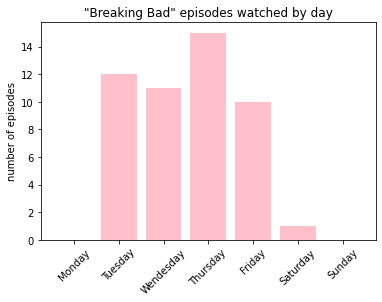

In [50]:
plt.bar(['Monday', 'Tuesday', 'Wendesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], breaking_bad_by_day, color = 'pink')
plt.xticks(rotation=45)
plt.title('\"Breaking Bad\" episodes watched by day')
plt.ylabel('number of episodes')
pass

Now I am chcecking the time of the day when the 'Breaking Bad' was most watched by counting the number of episodes per hour of day

In [51]:
breaking_bad['hour'] = pd.Categorical(breaking_bad['hour'], categories = np.arrange(24), ordered=True)
breaking_bad_by_hour = breaking_bad['hour'].value_counts()
breaking_bad_by_hour = breaking_bad_by_hour.sort_index()

AttributeError: module 'numpy' has no attribute 'arrange'

Here I am preenting the bar chart related to the hours, when 'Breaking Bad' was watched. We can see that the "business hours" are evening were the most common

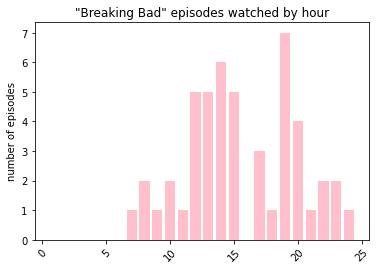

In [35]:
plt.bar(np.arrange(0, 25), breaking_bad_by_hour, color = 'pink')
plt.xticks(rotation=45)
plt.title('\"Breaking Bad\" episodes watched by hour')
plt.ylabel('number of episodes')
pass

Now I am going back to the whole dataset and I am analysing the number of hours spent on watching Netflix by single user

In [36]:
user_records = df[df['Profile Name'].str.contains('Maciek')]
user_records = user_records.set_index('Start Time')
events_counts = user_records['Duration'].resample('D').sum()
events_counts

Start Time
2021-03-29 00:00:00+02:00   0 days 00:00:06
2021-03-30 00:00:00+02:00   0 days 00:23:57
2021-03-31 00:00:00+02:00   0 days 00:00:00
2021-04-01 00:00:00+02:00   0 days 00:00:00
2021-04-02 00:00:00+02:00   0 days 00:00:00
                                  ...      
2021-06-02 00:00:00+02:00   0 days 00:00:00
2021-06-03 00:00:00+02:00   0 days 00:00:00
2021-06-04 00:00:00+02:00   0 days 00:00:00
2021-06-05 00:00:00+02:00   0 days 08:03:11
2021-06-06 00:00:00+02:00   0 days 03:45:49
Freq: D, Name: Duration, Length: 70, dtype: timedelta64[ns]

Here I am drawing a bar chart presenting the number of hours spent on watching Netflix dependent on date by single user

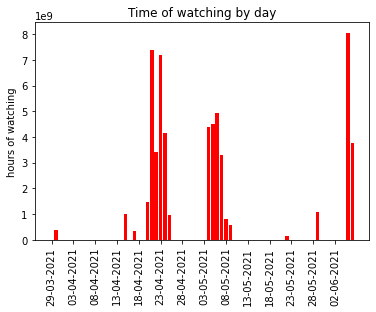

In [37]:
plt.bar(events_counts.index.strftime("%d-%m-%Y"), events_counts.apply(lambda x: x/(3600)), color = 'red')
plt.xticks(rotation=90, ticks= range(0, len(events_counts), 5))
plt.title('Time of watching by day')
plt.ylabel('hours of watching')
pass

Now I am preparing a function which takes profile name as variable. I am selecting data for specified profile and only that events during which Netflix was watched at least 5 min. I am summarising total time of watching Netflix and I am calculating the percentage of total time of watching Netflix per weekday

In [38]:
def get_watching_percentage(profile_name):
    user_df = df[df['Profile Name'].str.contains(profile_name)]
    user_df = user_df[(user_df['Duration'] > '0 days 0:05:00')]
    user_df ['weekday'] = user_df ['Start Time'].dt.weekday
    weekday_grouped = user_df.groupby('weekday')['Duration'].sum().dt.total_seconds()
    sum_time_watching = weekday_grouped.sum()
    time_watching_percentage = (weekday_grouped/sum_time_watching)*100
    idx = pd.RangeIndex(start=0, stop=7)
    tmp = pd.Series(index = idx, dtype='float64')
    tmp.update(time_watching_percentage)
    tmp.fillna(0, inplace=True)
    return tmp





Here I am presenting plot showing the comparison between perecentage of total time watching Netflix per day for two different users

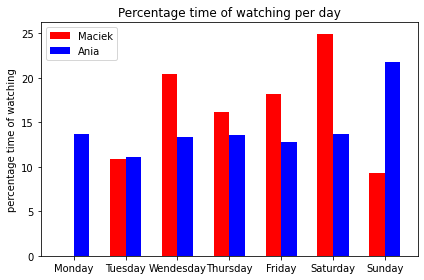

In [39]:
figure, ax = plt.subplots()
width = 0.3
labels = ['Monday', 'Tuesday', 'Wendesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = np.arange(len(labels))
profile1 = ax.bar(x - width/2, get_watching_percentage('Maciek'), width, color = 'red', label='Maciek')
profile2 = ax.bar(x + width/2, get_watching_percentage('Ania'), width, color = 'pink', label='Ania')
ax.set_ylabel('percentage time of watching')
ax.set_title('Percentage time of watching per day')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc=2)
figure.tight_layout()

plt.show()